# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.svm import SVC

# Load the dataset


In [131]:
df = pd.read_csv('/content/Traffic_Jams.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [133]:
df['Time'] = pd.to_timedelta(df['Time'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Time               6324 non-null   timedelta64[ns]
 1   Date               6324 non-null   int64          
 2   Day of the week    6324 non-null   object         
 3   CarCount           6324 non-null   int64          
 4   BikeCount          6324 non-null   int64          
 5   BusCount           6324 non-null   int64          
 6   TruckCount         6324 non-null   int64          
 7   Total              6324 non-null   int64          
 8   Traffic Situation  6324 non-null   object         
dtypes: int64(6), object(2), timedelta64[ns](1)
memory usage: 444.8+ KB


In [135]:
le = LabelEncoder()


In [136]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

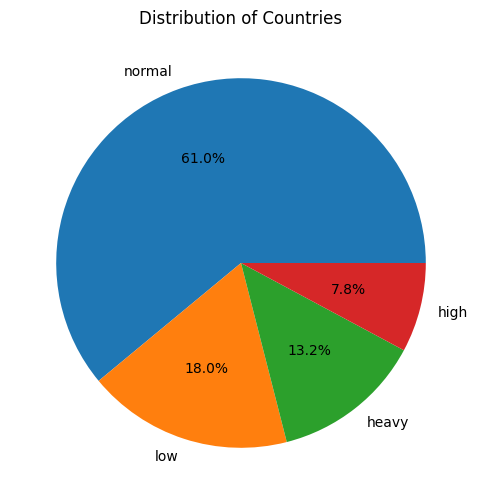

In [137]:
plt.figure(figsize=(10, 6))
plt.pie(df['Traffic Situation'].value_counts(), labels=df['Traffic Situation'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Countries')
plt.show()

In [138]:
df['Day of the week'] = le.fit_transform(df[['Day of the week']])

In [139]:
df['Traffic Situation'] = le.fit_transform(df[['Traffic Situation']])

In [140]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0 days 12:00:00,10,5,13,2,2,24,41,3
1,0 days 12:15:00,10,5,14,1,1,36,52,3
2,0 days 12:30:00,10,5,10,2,2,32,46,3
3,0 days 12:45:00,10,5,10,2,2,36,50,3
4,0 days 01:00:00,10,5,11,2,1,34,48,3


In [141]:
df['Day of the week'].unique()

array([5, 6, 4, 0, 2, 3, 1])

In [142]:
df['Traffic Situation'].unique()

array([3, 2, 0, 1])

In [143]:
df.isna().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [144]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [145]:
df.describe()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,6324,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,0 days 06:53:36.888045540,16.043327,3.179475,64.355629,12.013283,12.557875,18.658128,107.584915,2.172201
std,0 days 03:27:48.516329991,8.956907,2.009439,44.307088,11.363955,12.319831,10.724822,55.850784,1.173908
min,0 days 01:00:00,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0 days 04:00:00,8.000000,1.000000,18.000000,3.000000,1.000000,10.000000,53.000000,1.000000
50%,0 days 07:00:00,16.000000,3.000000,61.000000,9.000000,10.000000,18.000000,103.000000,3.000000
75%,0 days 09:45:00,24.000000,5.000000,101.250000,19.000000,20.000000,27.000000,151.000000,3.000000
max,0 days 12:45:00,31.000000,6.000000,180.000000,70.000000,50.000000,60.000000,279.000000,3.000000


In [146]:
df_corr = df.select_dtypes(include=[np.number])

In [147]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

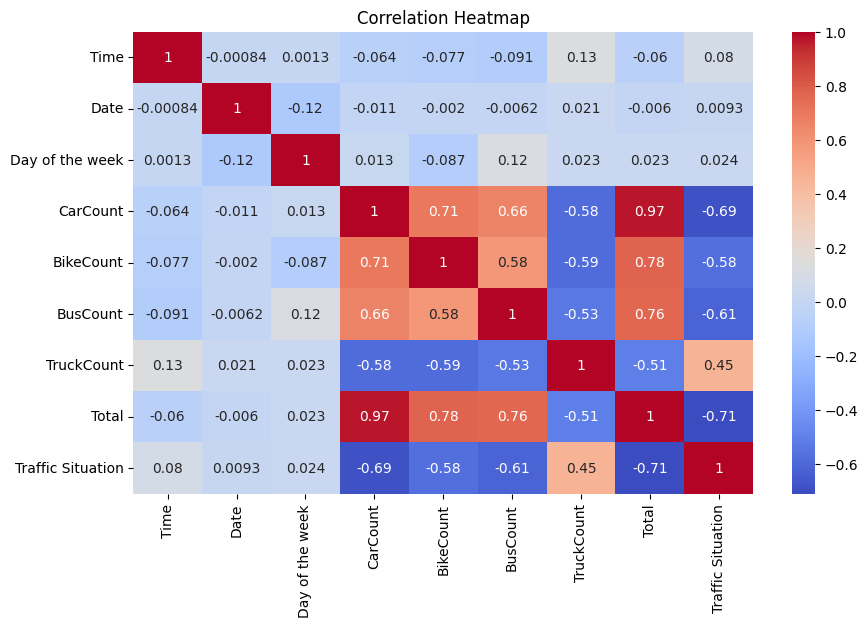

In [148]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Time               6324 non-null   timedelta64[ns]
 1   Date               6324 non-null   int64          
 2   Day of the week    6324 non-null   int64          
 3   CarCount           6324 non-null   int64          
 4   BikeCount          6324 non-null   int64          
 5   BusCount           6324 non-null   int64          
 6   TruckCount         6324 non-null   int64          
 7   Total              6324 non-null   int64          
 8   Traffic Situation  6324 non-null   int64          
dtypes: int64(8), timedelta64[ns](1)
memory usage: 444.8 KB


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Time               6324 non-null   timedelta64[ns]
 1   Date               6324 non-null   int64          
 2   Day of the week    6324 non-null   int64          
 3   CarCount           6324 non-null   int64          
 4   BikeCount          6324 non-null   int64          
 5   BusCount           6324 non-null   int64          
 6   TruckCount         6324 non-null   int64          
 7   Total              6324 non-null   int64          
 8   Traffic Situation  6324 non-null   int64          
dtypes: int64(8), timedelta64[ns](1)
memory usage: 444.8 KB


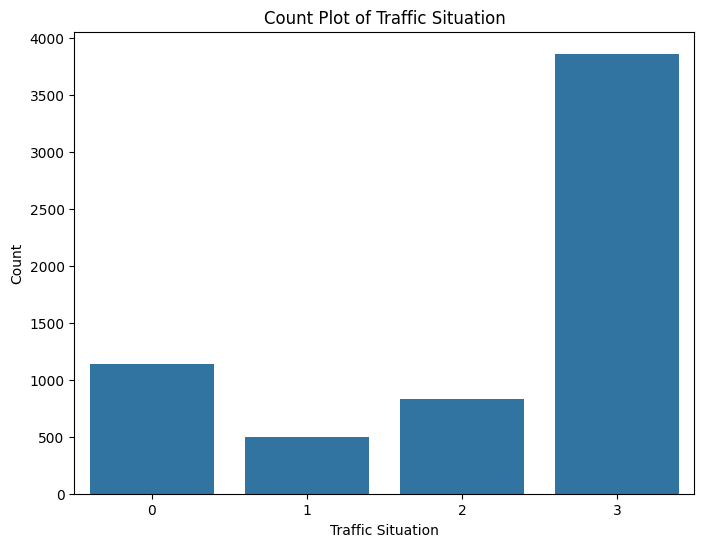

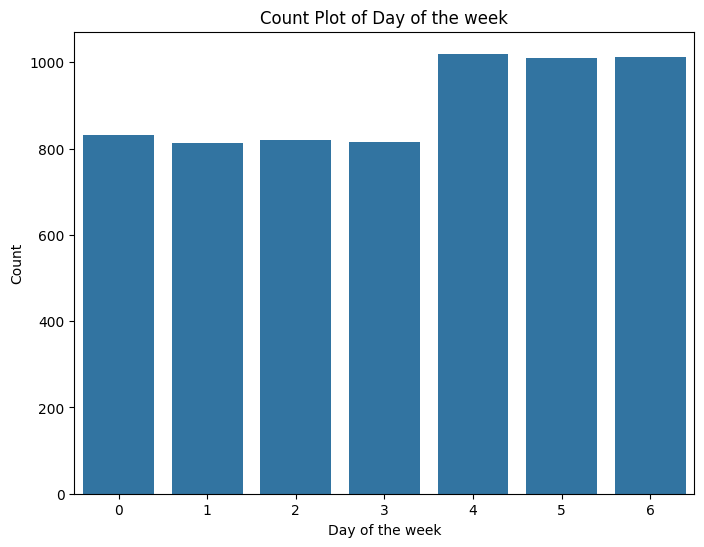

In [151]:
# prompt: Distribution of country, gender, products_number: count plots

# Count Plots for Categorical Features
categorical_features = ['Traffic Situation', 'Day of the week']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {feature}')
    plt.show()


In [152]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [153]:
df.drop('Time', axis=1, inplace=True)

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [154]:
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [156]:
# Initialize and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = random_forest_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, predictions))

Random Forest Model Accuracy: 89.80%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.78      0.78      0.78       102
           2       0.69      0.81      0.74       149
           3       0.93      0.90      0.92       794

    accuracy                           0.90      1265
   macro avg       0.85      0.87      0.86      1265
weighted avg       0.90      0.90      0.90      1265



### Evaluate the model performance

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [158]:

base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)


adaboost_classifier.fit(X_train, y_train)


predictionsB = adaboost_classifier.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f'AdaBoost Classifier Model Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, predictionsB))


AdaBoost Classifier Model Accuracy: 89.80%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.85      0.34      0.49       102
           2       0.00      0.00      0.00       149
           3       0.78      0.99      0.88       794

    accuracy                           0.82      1265
   macro avg       0.66      0.58      0.59      1265
weighted avg       0.73      0.82      0.76      1265



### Evaluate the model performance

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [159]:
base_models = [
    ('rf', random_forest_classifier),
    ('xgb', adaboost_classifier)
]


stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)


stacking_classifier.fit(X_train, y_train)


y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.8948616600790514
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.75      0.78      0.77       102
           2       0.70      0.79      0.74       149
           3       0.93      0.90      0.92       794

    accuracy                           0.89      1265
   macro avg       0.84      0.87      0.85      1265
weighted avg       0.90      0.89      0.90      1265



In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

### Define meta-learner (LogisticRegression)

In [161]:
# Initialize base classifier and Bagging Meta-estimator
base_estimator = KNeighborsClassifier()
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=50, random_state=42)

# Train the classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictionsM = bagging_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictionsM)
print(f'Bagging Classifier Model Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, predictionsM))

Bagging Classifier Model Accuracy: 89.09%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       220
           1       0.78      0.69      0.73       102
           2       0.71      0.82      0.76       149
           3       0.92      0.91      0.91       794

    accuracy                           0.89      1265
   macro avg       0.85      0.85      0.84      1265
weighted avg       0.89      0.89      0.89      1265



### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [164]:

base_modelsST = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier(random_state=42))
]


metaST_model = LogisticRegression()

In [167]:

stacking_classifier = StackingClassifier(estimators=base_modelsST, final_estimator=metaST_model, cv=5)


stacking_classifier.fit(X_train, y_train)

predictions = stacking_classifier.predict(X_test)

### Evaluate the model performance

In [168]:

accuracy = accuracy_score(y_test, predictions)
print(f'Stacking Classifier Model Accuracy: {accuracy * 100:.2f}%')

Stacking Classifier Model Accuracy: 91.07%


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:
#1- Feature selectoions was based with features that can predict traffic situation such as the total number of cars which is the most important feature and also then the rest of features that can effect the Traffic jam situation

# i have also change time datatype and also the day of the week with label encoder




# 2- Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?

# Bagging and boosting are ways to improve the predictions of the models by aggregating their results through voting if classifications and averging in regression, i have tried to chose the models such as random forest, and decision tree base model with Adaboost classifier, and i was seeing the results to see which one is better

# The Stacking did the best as it takes the dataset and put it in each model sequentially, and not subsets and that is the reason that it. got the highest accuracy


# 3 - The Stacking as it is improve with each model sequentially, other methods accuracy were close to each other

# 4- precision    recall  f1-score   support,
# it measures the accuracy of the predictions of the model and uppon all the models it was very close in accuracy
